In [219]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [220]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/April2021/PCA/"

In [221]:
summary_filename = paste0(folder, "PC1/summary.csv")
df0 = read.csv(summary_filename, row.names = 1)
# df0 = df0[df0$chrom == 2,]
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
nrow(df0)
head(df0,2)

[1] 2448

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000011523_CEP68,2,2,0.0006375662,2_65279223_C_T,0.001275132,0.007192452
1,ENSG00000011523_CEP68,2,2,0.0013394110,2_65290842_C_A,0.002678822,0.012908969


In [222]:
# hist(df0$qv)
c(length(unique(df0[df0$qv<0.05,"gene"])), length(unique(df0[df0$qv<0.05,"gene"]))/length(unique(df0$gene)))

[1] 560.0000000   0.3478261

In [223]:
summary_filename = paste0(folder, "PC10/summary.csv")
df1 = read.csv(summary_filename, row.names = 1)
# df1 = df1[df1$chrom == 2,]
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
nrow(df1)
head(df1,2)

[1] 2172

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000011523_CEP68,2,2,0.30551608,2_65279223_C_T,0.6110322,0.8331211
1,ENSG00000011523_CEP68,2,2,0.09095796,2_65290842_C_A,0.1819159,0.3624865


In [224]:
# hist(df1$qv)
c(length(unique(df1[df1$qv<0.05,"gene"])), length(unique(df1[df1$qv<0.05,"gene"]))/length(unique(df1$gene)))

[1] 417.0000000   0.3015184

In [225]:
df2 = inner_join(df0, df1, by = c("snpID","gene","chrom","n_snps"), suffix = c(".1",".10"))
nrow(df2)
head(df2,2)

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

[1] 2172

gene,n_snps,chrom,pv_raw.1,snpID,pv.1,qv.1,pv_raw.10,pv.10,qv.10
ENSG00000011523_CEP68,2,2,0.0006375662,2_65279223_C_T,0.001275132,0.007192452,0.30551608,0.6110322,0.8331211
ENSG00000011523_CEP68,2,2,0.0013394110,2_65290842_C_A,0.002678822,0.012908969,0.09095796,0.1819159,0.3624865


In [226]:
# unique(df2$chrom[order(df2$chrom)])

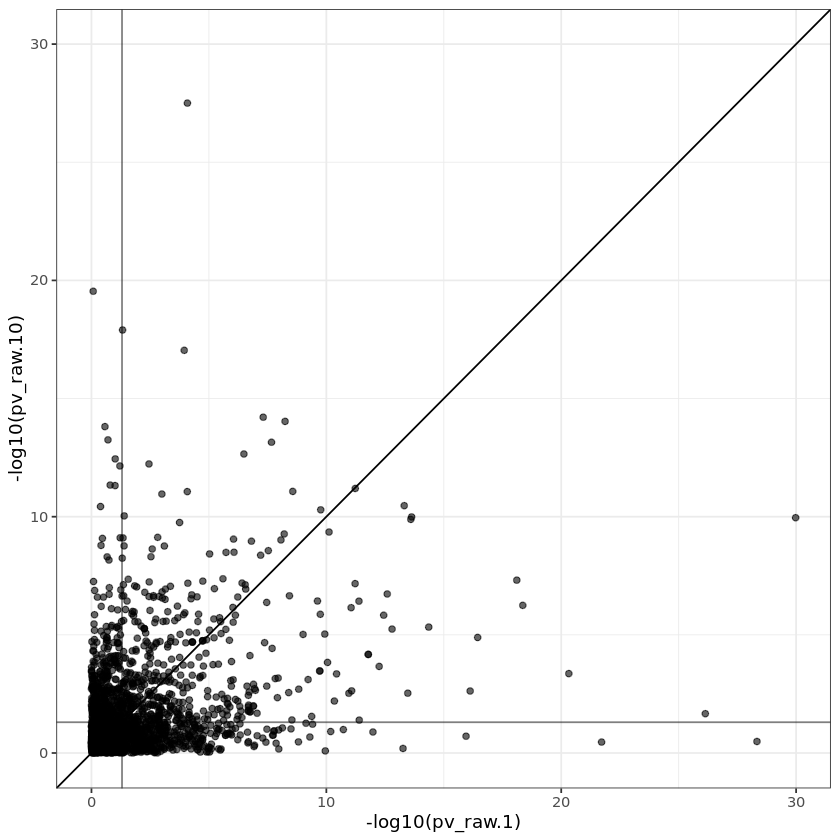

In [227]:
# p = ggplot(df2, aes(x = -log10(qv.1), y = -log10(qv.10))) + geom_point(alpha = 0.6) 
p = ggplot(df2, aes(x = -log10(pv_raw.1), y = -log10(pv_raw.10))) + geom_point(alpha = 0.6) 
p = p + geom_abline() + theme_bw()
p = p + geom_vline(xintercept = -log10(0.05), alpha = 0.5) + geom_hline(yintercept = -log10(0.05), alpha = 0.5)
m = -log10(min(min(df2$pv_raw.1),min(df2$pv_raw.10)))
p = p + xlim(c(0,m)) + ylim(c(0,m))
p

In [228]:
# df3 = df2[df2$qv.1>0.05 & df2$qv.10<0.05, ]
df3 = df2[df2$qv.10<0.05, ]
head(df3[order(df3$qv.10),])

,gene,n_snps,chrom,pv_raw.1,snpID,pv.1,qv.1,pv_raw.10,pv.10,qv.10
422,ENSG00000137812_CASC5,2,15,8.217124e-05,15_40891319_T_A,1.643425e-04,1.314740e-03,3.138106e-28,6.276212e-28,1.363193e-24
17,ENSG00000147813_NAPRT1,1,8,8.412191e-01,8_144676862_C_T,8.412191e-01,1.000000e+00,2.884586e-20,2.884586e-20,3.132661e-17
1073,ENSG00000165650_PDZD8,2,10,4.735472e-02,10_119020736_A_C,9.470944e-02,2.132176e-01,1.256048e-18,2.512096e-18,1.818758e-15
613,ENSG00000134222_PSRC1,1,1,1.123669e-04,1_109822143_G_A,1.123669e-04,9.824080e-04,9.094711e-18,9.094711e-18,4.938428e-15
1128,ENSG00000100526_CDKN3,1,14,4.863517e-08,14_54861622_G_C,4.863517e-08,1.384406e-06,6.180530e-15,6.180530e-15,2.684822e-12
1261,ENSG00000092208_GEMIN2,1,14,5.714760e-09,14_39583481_A_G,5.714760e-09,2.256409e-07,9.257249e-15,9.257249e-15,3.351124e-12


In [229]:
# df4 = df2[df2$qv.1<0.05 & df2$qv.10>0.05, ]
df4 = df2[df2$qv.1<0.05, ]
head(df4[order(df4$qv.1),])

,gene,n_snps,chrom,pv_raw.1,snpID,pv.1,qv.1,pv_raw.10,pv.10,qv.10
600,ENSG00000184674_GSTT1,1,22,1.044819e-30,22_24295427_C_T,1.044819e-30,2.557716e-27,1.103940e-10,1.103940e-10,1.042503e-08
678,ENSG00000099284_H2AFY2,2,10,4.642900e-29,10_71796616_G_A,9.285801e-29,1.136582e-25,3.257951e-01,6.515901e-01,8.666588e-01
377,ENSG00000232196_MTRNR2L4,1,16,7.330204e-27,16_3508261_C_G,7.330204e-27,5.981446e-24,2.170228e-02,2.170228e-02,7.741503e-02
2154,ENSG00000148200_NR6A1,1,9,1.916265e-22,9_127246812_T_C,1.916265e-22,1.172754e-19,3.447949e-01,3.447949e-01,5.539161e-01
1069,ENSG00000112378_PERP,2,6,4.746487e-21,6_138426798_G_T,9.492975e-21,4.647760e-18,4.367653e-04,8.735306e-04,6.282479e-03
388,ENSG00000120675_DNAJC15,1,13,4.329049e-19,13_43597706_C_T,4.329049e-19,1.766252e-16,5.647016e-07,5.647016e-07,1.460157e-05
